### Optimal Paremeters
Paremeter values that bring the model in cloest agreement with the data, the parameters are only optimal for the model you chose for your data. WE will using hacker statatistic with numpy

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nohitter_times =np.array([ 843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,
        715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,
        104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,
        166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,
        308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,
       1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,
         77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,
        557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,
       1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,
        219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,
        176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,
        774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,
        192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,
        156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,
        576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899,
       3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,
        110,  215,    0,  563,  206,  660,  242,  577,  179,  157,  192,
        192, 1848,  792, 1693,   55,  388,  225, 1134, 1172, 1555,   31,
       1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745,
       2491,  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138,
       1202,  296,  277,  351,  391,  950,  459,   62, 1056, 1128,  139,
        420,   87,   71,  814,  603, 1349,  162, 1027,  783,  326,  101,
        876,  381,  905,  156,  419,  239,  119,  129,  467])

### How often do we get no-hitters?

The number of games played between each no-hitter in the modern era (1901-2015) of Major League Baseball is stored in the array `nohitter_times`. 

If you assume that no-hitters are described as a `Poisson process`, then the time between no-hitters is `Exponentially distributed`. As you have seen, the Exponential distribution has a single parameter, which we will call τ, the typical interval time. The value of the parameter τ that makes the exponential distribution best match the data is the `mean` interval time (where time is in units of number of games) between no-hitters.

Compute the value of this parameter from the data. Then, use `np.random.exponential()` to "repeat" the history of Major League Baseball by drawing inter-no-hitter times from an exponential distribution with the τ you found and plot the histogram as an approximation to the PDF.

`NumPy`, `pandas`, `matlotlib.pyplot`, and `seaborn` have been imported for you as `np`, `pd`, `plt`, and `sns`, respectively.

   #### Instructions

    1-Seed the random number generator with 42.

    2-Compute the mean time (in units of number of games) between no-hitters.

    3-Draw 100,000 samples from an Exponential distribution with the parameter you computed from the mean of the inter-no-hitter times.

    4-Plot the theoretical PDF using plt.hist(). Remember to use keyword arguments bins=50, normed=True, and histtype='step'. Be sure to label your axes.

    5-Show your plot.

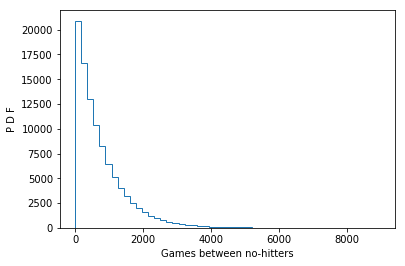

In [3]:
np.random.seed(42)

tau = np.mean(nohitter_times)

inter_no_hitter = np.random.exponential(tau, size=100000)

_ = plt.hist(inter_no_hitter, bins=50, histtype='step')
_ = plt.xlabel('Games between no-hitters')

_ = plt.ylabel('P D F')

plt.show()

In [4]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y


   #### Instructions

    1- Compute an ECDF from the actual time between no-hitters (nohitter_times). Use the ecdf() function you wrote in the prequel course.

    2- a CDF from the theoretical samples you took in the last exercise (inter_nohitter_time).
    Plot x_theor and y_theor as a line using plt.plot(). Then overlay the ECDF of the real data x and y as points. To do this, you have to specify the keyword arguments marker = '.' and linestyle = 'none' in addition to x and y inside plt.plot().

    3- Set a 2% margin on the plot.

    4- Show the plot.

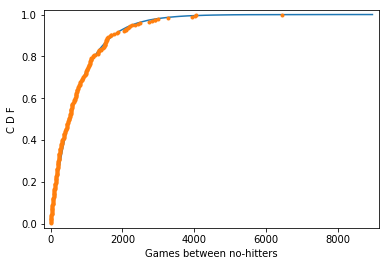

In [5]:
x, y =ecdf(nohitter_times)

x_theor, y_theor = ecdf(inter_no_hitter)

_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker = '.', linestyle='none')

plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('C D F')
plt.show()


### How is this parameter optimal?
Now sample out of an exponential distribution with τ being twice as large as the optimal τ. Do it again for τ half as large. Make CDFs of these samples and overlay them with your data. You can see that they do not reproduce the data as well. Thus, the τ you computed from the mean inter-no-hitter times is optimal in that it best reproduces the data.

`Note`: In this and all subsequent exercises, the random number generator is pre-seeded for you to save you some typing.

   #### Instructions
    1- Take 10000 samples out of an Exponential distribution with parameter τ1/2 = tau/2.

    2- Take 10000 samples out of an Exponential distribution with parameter τ2 = 2*tau.

    3- Generate CDFs from these two sets of samples using your ecdf() function.

    4- Add these two CDFs as lines to your plot. This has been done for you, so hit 'Submit Answer' to view the plot!

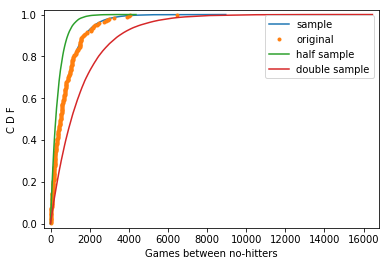

In [6]:
x, y =ecdf(nohitter_times)
x_theor, y_theor = ecdf(inter_no_hitter)

_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker = '.', linestyle='none')

half   = np.random.exponential(tau/2, size=100000)
double = np.random.exponential(tau*2, size=100000)

x_half, y_half = ecdf(half)
x_double, y_double =ecdf(double)

_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)
_ = plt.legend(('sample', 'original', 'half sample', 'double sample'))

plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('C D F')
plt.show()


##### Linear Regressian by least squarest

The slope sets the how step the line is, and the intercept sets where the line crosses the y-axis. We wan tto chose the slope and intercept such that the data points cillectively lie on as close as possible to the line. The vertical distance between the data and point and the line is called the residul.

We will use the Numpy fuctions polyfit, which performs least squares analysis with polynamic functions, we can use it becasue a linear fuctions is  a first degree polynominal.

### EDA of literacy/fertility data
In the next few exercises, we will look at the correlation between female literacy and fertility (defined as the average number of children born per woman) throughout the world. For ease of analysis and interpretation, we will work with the illiteracy rate.

It is always a good idea to do some EDA ahead of our analysis. To this end, plot the fertility versus illiteracy and compute the Pearson correlation coefficient. The Numpy array illiteracy has the illiteracy rate among females for most of the world's nations. The array fertility has the corresponding fertility data.

Here, it may be useful to refer back to the function you wrote in the previous course to compute the Pearson correlation coefficient.

   #### Instructions

    1- Plot fertility (y-axis) versus illiteracy (x-axis) as a scatter plot.

    2-Set a 2% margin.

    3-Compute and print the Pearson correlation coefficient between illiteracy and fertility.

In [7]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)


    # Return entry [0,1]
    return corr_mat[0,1]

In [8]:
illiteracy =np.array([  9.5,  49.2,   1. ,  11.2,   9.8,  60. ,  50.2,  51.2,   0.6,
         1. ,   8.5,   6.1,   9.8,   1. ,  42.2,  77.2,  18.7,  22.8,
         8.5,  43.9,   1. ,   1. ,   1.5,  10.8,  11.9,   3.4,   0.4,
         3.1,   6.6,  33.7,  40.4,   2.3,  17.2,   0.7,  36.1,   1. ,
        33.2,  55.9,  30.8,  87.4,  15.4,  54.6,   5.1,   1.1,  10.2,
        19.8,   0. ,  40.7,  57.2,  59.9,   3.1,  55.7,  22.8,  10.9,
        34.7,  32.2,  43. ,   1.3,   1. ,   0.5,  78.4,  34.2,  84.9,
        29.1,  31.3,  18.3,  81.8,  39. ,  11.2,  67. ,   4.1,   0.2,
        78.1,   1. ,   7.1,   1. ,  29. ,   1.1,  11.7,  73.6,  33.9,
        14. ,   0.3,   1. ,   0.8,  71.9,  40.1,   1. ,   2.1,   3.8,
        16.5,   4.1,   0.5,  44.4,  46.3,  18.7,   6.5,  36.8,  18.6,
        11.1,  22.1,  71.1,   1. ,   0. ,   0.9,   0.7,  45.5,   8.4,
         0. ,   3.8,   8.5,   2. ,   1. ,  58.9,   0.3,   1. ,  14. ,
        47. ,   4.1,   2.2,   7.2,   0.3,   1.5,  50.5,   1.3,   0.6,
        19.1,   6.9,   9.2,   2.2,   0.2,  12.3,   4.9,   4.6,   0.3,
        16.5,  65.7,  63.5,  16.8,   0.2,   1.8,   9.6,  15.2,  14.4,
         3.3,  10.6,  61.3,  10.9,  32.2,   9.3,  11.6,  20.7,   6.5,
         6.7,   3.5,   1. ,   1.6,  20.5,   1.5,  16.7,   2. ,   0.9])

In [9]:
fertility = np.array([ 1.769,  2.682,  2.077,  2.132,  1.827,  3.872,  2.288,  5.173,
        1.393,  1.262,  2.156,  3.026,  2.033,  1.324,  2.816,  5.211,
        2.1  ,  1.781,  1.822,  5.908,  1.881,  1.852,  1.39 ,  2.281,
        2.505,  1.224,  1.361,  1.468,  2.404,  5.52 ,  4.058,  2.223,
        4.859,  1.267,  2.342,  1.579,  6.254,  2.334,  3.961,  6.505,
        2.53 ,  2.823,  2.498,  2.248,  2.508,  3.04 ,  1.854,  4.22 ,
        5.1  ,  4.967,  1.325,  4.514,  3.173,  2.308,  4.62 ,  4.541,
        5.637,  1.926,  1.747,  2.294,  5.841,  5.455,  7.069,  2.859,
        4.018,  2.513,  5.405,  5.737,  3.363,  4.89 ,  1.385,  1.505,
        6.081,  1.784,  1.378,  1.45 ,  1.841,  1.37 ,  2.612,  5.329,
        5.33 ,  3.371,  1.281,  1.871,  2.153,  5.378,  4.45 ,  1.46 ,
        1.436,  1.612,  3.19 ,  2.752,  3.35 ,  4.01 ,  4.166,  2.642,
        2.977,  3.415,  2.295,  3.019,  2.683,  5.165,  1.849,  1.836,
        2.518,  2.43 ,  4.528,  1.263,  1.885,  1.943,  1.899,  1.442,
        1.953,  4.697,  1.582,  2.025,  1.841,  5.011,  1.212,  1.502,
        2.516,  1.367,  2.089,  4.388,  1.854,  1.748,  2.978,  2.152,
        2.362,  1.988,  1.426,  3.29 ,  3.264,  1.436,  1.393,  2.822,
        4.969,  5.659,  3.24 ,  1.693,  1.647,  2.36 ,  1.792,  3.45 ,
        1.516,  2.233,  2.563,  5.283,  3.885,  0.966,  2.373,  2.663,
        1.251,  2.052,  3.371,  2.093,  2.   ,  3.883,  3.852,  3.718,
        1.732,  3.928])

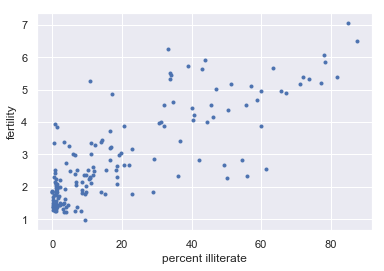

In [10]:
sns.set()

_ = plt.plot(illiteracy,fertility, marker='.', linestyle='none')
_ = plt.xlabel('percent illiterate')
_ =plt.ylabel('fertility')


plt.show()




In [11]:
print(pearson_r(illiteracy, fertility))

0.8041324026815341


### Linear regression
We will assume that fertility is a linear function of the female illiteracy rate. That is, f=ai+b, where a is the slope and b is the intercept. We can think of the intercept as the minimal fertility rate, probably somewhere between one and two. The slope tells us how the fertility rate varies with illiteracy. We can find the best fit line using np.polyfit().

Plot the data and the best fit line. Print out the slope and intercept. (Think: what are their units?)

   #### Instructions

    1- Compute the slope and intercept of the regression line using np.polyfit(). Remember, fertility is on the y-axis and illiteracy on the x-axis.

    2- Print out the slope and intercept from the linear regression.

    3-To plot the best fit line, create an array x that consists of 0 and 100 using np.array(). Then, compute the theoretical values of y based on your regression parameters. I.e., y = a * x + b.

    4-Plot the data and the regression line on the same plot. Be sure to label your axes.

    5-Hit 'Submit Answer' to display your plot.

slope =  0.04979854809063423  children per women/ percent illiterate 
intercept =  1.888050610636557  children per women


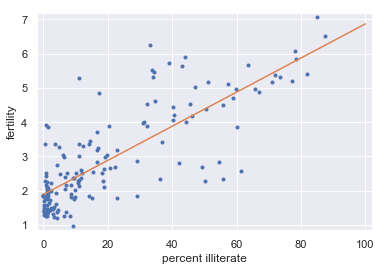

In [12]:
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

a, b = np.polyfit(illiteracy, fertility, 1)
print('slope = ', a, ' children per women/ percent illiterate ')
print('intercept = ',b, ' children per women')

x = np.array([0,100])
y = a*x + b

_ = plt.plot(x, y)
plt.show()

### How is it optimal?
The function np.polyfit() that you used to get your regression parameters finds the optimal slope and intercept. It is optimizing the sum of the squares of the residuals, also known as RSS (for residual sum of squares). In this exercise, you will plot the function that is being optimized, the RSS, versus the slope parameter a. To do this, fix the intercept to be what you found in the optimization. Then, plot the RSS vs. the slope. Where is it minimal?

   #### Instructions

    1- Specify the values of the slope to compute the RSS. Use np.linspace() to get 200 points in the range between 0 and 0.1. For example, to get 100 points in the range between 0 and 0.5, you could use np.linspace() like so: np.linspace(0, 0.5, 100).

    2- Initialize an array, rss, to contain the RSS using np.empty_like() and the array you created above. The empty_like() function returns a new array with the same shape and type as a given array (in this case, a_vals).
 
     3-Write a for loop to compute the sum of RSS of the slope. Hint: the RSS is given by np.sum((y_data - a * x_data - b)**2). The variable b you computed in the last exercise is already in your namespace. Here, fertility is the y_data and illiteracy the x_data.

    4-Plot the RSS (rss) versus slope (a_vals).

    5-Hit 'Submit Answer' to see the plot!

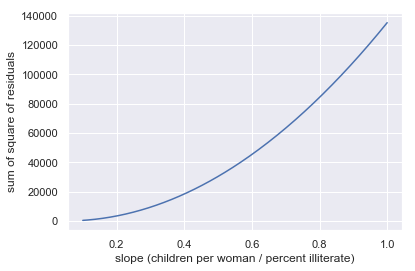

In [13]:
# Specify slopes to consider: a_vals
a_vals = np.linspace(1, 0.1, 200)

#Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a * illiteracy -b) **2)
    
    
_ = plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()



### Linear regression on appropriate Anscombe data
For practice, perform a linear regression on the data set from Anscombe's quartet that is most reasonably interpreted with linear regression.

#### Instructions

    Compute the parameters for the slope and intercept using np.polyfit(). The Anscombe data are stored in the arrays 
    1-x and y.
    2-Print the slope a and intercept b.
    3-Generate theoretical x and y data from the linear regression. Your x array, which you can create with np.array(), should consist of 3 and 15. To generate the y data, multiply the slope by x_theor and add the intercept.
    4-Plot the Anscombe data as a scatter plot and then plot the theoretical line. Remember to include the marker='.' and linestyle='none' keyword arguments in addition to x and y when to plot the Anscombe data as a scatter plot. You do not need these arguments when plotting the theoretical line.
    5-Hit 'Submit Answer' to see the plot!

0.5000909090909095 3.0000909090909076


<function matplotlib.pyplot.show(*args, **kw)>

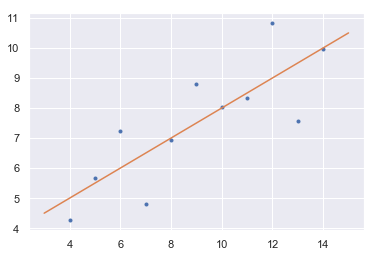

In [14]:
x = np.array([ 10.,   8.,  13.,   9.,  11.,  14.,   6.,   4.,  12.,   7.,   5.])
y = np.array([  8.04,   6.95,   7.58,   8.81,   8.33,   9.96,   7.24,   4.26,
        10.84,   4.82,   5.68])

a, b  = np.polyfit(x,y,1)
print(a, b)

x_theor = np.array([3,15])
y_theor = x_theor * a + b 

_ = plt.plot(x, y , marker='.', linestyle='none')
_ = plt.plot(x_theor, y_theor)

plt.show

### Visualizing bootstrap samples
In this exercise, you will generate bootstrap samples from the set of annual rainfall data measured at the Sheffield Weather Station in the UK from 1883 to 2015. The data are stored in the NumPy array rainfall in units of millimeters (mm). By graphically displaying the bootstrap samples with an ECDF, you can get a feel for how bootstrap sampling allows probabilistic descriptions of data.

#### Instructions

    1- Write a for loop to acquire 50 bootstrap samples of the rainfall data and plot their ECDF.
Use np.random.choice() to generate a bootstrap sample from the NumPy array rainfall. Be sure that the size of the resampled array is len(rainfall).

    2- Use the function ecdf() that you wrote in the prequel to this course to generate the x and y values for the ECDF of the bootstrap sample bs_sample.

    3-Plot the ECDF values. Specify color='gray' (to make gray dots) and alpha=0.1 (to make them semi-transparent, since we are overlaying so many) in addition to the marker='.' and linestyle='none' keyword arguments.
  
    4-Use ecdf() to generate x and y values for the ECDF of the original rainfall data available in the array rainfall.

    5-Plot the ECDF values of the original data.

    6-Hit 'Submit Answer' to visualize the samples!

In [15]:
rainfall =np.array([  875.5,   648.2,   788.1,   940.3,   491.1,   743.5,   730.1,
         686.5,   878.8,   865.6,   654.9,   831.5,   798.1,   681.8,
         743.8,   689.1,   752.1,   837.2,   710.6,   749.2,   967.1,
         701.2,   619. ,   747.6,   803.4,   645.6,   804.1,   787.4,
         646.8,   997.1,   774. ,   734.5,   835. ,   840.7,   659.6,
         828.3,   909.7,   856.9,   578.3,   904.2,   883.9,   740.1,
         773.9,   741.4,   866.8,   871.1,   712.5,   919.2,   927.9,
         809.4,   633.8,   626.8,   871.3,   774.3,   898.8,   789.6,
         936.3,   765.4,   882.1,   681.1,   661.3,   847.9,   683.9,
         985.7,   771.1,   736.6,   713.2,   774.5,   937.7,   694.5,
         598.2,   983.8,   700.2,   901.3,   733.5,   964.4,   609.3,
        1035.2,   718. ,   688.6,   736.8,   643.3,  1038.5,   969. ,
         802.7,   876.6,   944.7,   786.6,   770.4,   808.6,   761.3,
         774.2,   559.3,   674.2,   883.6,   823.9,   960.4,   877.8,
         940.6,   831.8,   906.2,   866.5,   674.1,   998.1,   789.3,
         915. ,   737.1,   763. ,   666.7,   824.5,   913.8,   905.1,
         667.8,   747.4,   784.7,   925.4,   880.2,  1086.9,   764.4,
        1050.1,   595.2,   855.2,   726.9,   785.2,   948.8,   970.6,
         896. ,   618.4,   572.4,  1146.4,   728.2,   864.2,   793. ])

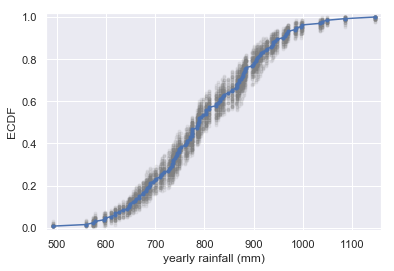

In [16]:
for _ in range(50):
    bs_sample = np.random.choice(rainfall, size = len(rainfall))
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker= '.', linestyle='none', color='gray', alpha=0.1)

x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.margins(0.02)

plt.show()

### Generating many bootstrap replicates
The function bootstrap_replicate_1d() from the video is available in your namespace. Now you'll write another function, draw_bs_reps(data, func, size=1), which generates many bootstrap replicates from the data set. This function will come in handy for you again and again as you compute confidence intervals and later when you do hypothesis tests.

For your reference, the bootstrap_replicate_1d() function is provided below:
```python
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))
```
   #### Instructions

    1-Define a function with call signature draw_bs_reps(data, func, size=1).
    2-Using np.empty(), initialize an array called bs_replicates of size size to hold all of the bootstrap replicates.
    3-Write a for loop that ranges over size and computes a replicate using bootstrap_replicate_1d(). Refer to the exercise description above to see the function signature of bootstrap_replicate_1d(). Store the replicate in the appropriate index of bs_replicates.
    4-Return the array of replicates bs_replicates. This has already been done for you.


In [17]:
def bootstrap_replicate_1d(data, func):
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [18]:
def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
       bs_replicates[i] = bootstrap_replicate_1d(data, func)
    return bs_replicates

### Bootstrap replicates of the mean and the SEM

In this exercise, you will compute a bootstrap estimate of the probability density function of the mean annual rainfall at the Sheffield Weather Station. Remember, we are estimating the mean annual rainfall we would get if the Sheffield Weather Station could repeat all of the measurements from 1883 to 2015 over and over again. This is a probabilistic estimate of the mean. You will plot the PDF as a histogram, and you will see that it is Normal.

In fact, it can be shown theoretically that under not-too-restrictive conditions, the value of the mean will always be Normally distributed. (This does not hold in general, just for the mean and a few other statistics.) The standard deviation of this distribution, called the standard error of the mean, or SEM, is given by the standard deviation of the data divided by the square root of the number of data points. I.e., for a data set, sem = np.std(data) / np.sqrt(len(data)). Using hacker statistics, you get this same result without the need to derive it, but you will verify this result from your bootstrap replicates.

The dataset has been pre-loaded for you into an array called rainfall.

   #### Instructions

    1- Draw 10000 bootstrap replicates of the mean annual rainfall using your draw_bs_reps() function and the rainfall array. Hint: Pass in np.mean for func to compute the mean.
    2- As a reminder, draw_bs_reps() accepts 3 arguments: data, func, and size.
    3- Compute and print the standard error of the mean of rainfall.
    4- The formula to compute this is np.std(data) / np.sqrt(len(data)).
    5- Compute and print the standard deviation of your bootstrap replicates bs_replicates.
    6- Make a histogram of the replicates using the normed=True keyword argument and 50 bins.
    7- Hit 'Submit Answer' to see the plot!

In [19]:
bs_replicating = draw_bs_reps(rainfall, np.mean , size=10000)

sem = np.std(rainfall) / np.sqrt(len(rainfall))
print('Standard error of the mean (sem): ', sem)
bs_sem = np.std(bs_replicating)
print('Standard deviation for bootstrap replicates: ', bs_sem)

Standard error of the mean (sem):  10.510549150506188
Standard deviation for bootstrap replicates:  10.47589069883622


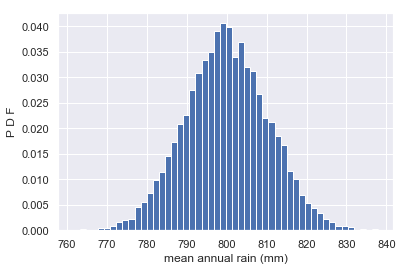

In [20]:
_ = plt.hist(bs_replicating, bins=50, density=True)
_ = plt.xlabel('mean annual rain (mm)')
_ = plt.ylabel('P D F')

plt.show()

### Confidence intervals of rainfall data
A confidence interval gives upper and lower bounds on the range of parameter values you might expect to get if we repeat our measurements. For named distributions, you can compute them analytically or look them up, but one of the many beautiful properties of the bootstrap method is that you can take percentiles of your bootstrap replicates to get your confidence interval. Conveniently, you can use the `np.percentile()` function.

Use the bootstrap replicates you just generated to compute the 95% confidence interval. That is, give the 2.5th and 97.5th percentile of your bootstrap replicates stored as `bs_replicates`. `What is the 95% confidence interval?`

In [21]:
percentile = np.percentile(bs_replicating, [2.5, 97.5])
print(percentile)

[779.56116541 820.7625    ]


### Bootstrap replicates of other statistics
We saw in a previous exercise that the mean is Normally distributed. This does not necessarily hold for other statistics, but no worry: as hackers, we can always take bootstrap replicates! In this exercise, you'll generate bootstrap replicates for the variance of the annual rainfall at the Sheffield Weather Station and plot the histogram of the replicates.

Here, you will make use of the draw_bs_reps() function you defined a few exercises ago. It is provided below for your reference:
```python
def draw_bs_reps(data, func, size=1):
    return np.array([bootstrap_replicate_1d(data, func) for _ in range(size)])
```
   #### Instructions

    1-Draw 10000 bootstrap replicates of the variance in annual rainfall, stored in the rainfall dataset, using your draw_bs_reps() function. Hint: Pass in np.var for computing the variance.
    2-Divide your variance replicates (bs_replicates) by 100 to put the variance in units of square centimeters for convenience.
    3-Make a histogram of bs_replicates using the normed=True keyword argument and 50 bins.

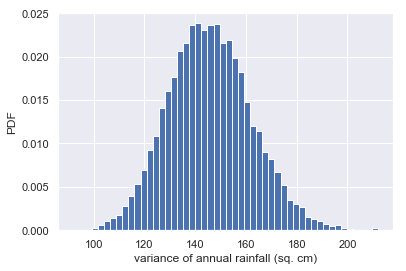

In [22]:
bs_var = draw_bs_reps(rainfall, np.var, size=10000)

bs_var = bs_var /100

_ = plt.hist(bs_var, bins=50, density=True)
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ =plt.ylabel('PDF')

plt.show()

    1-Generate 10000 bootstrap replicates of τ from the nohitter_times data using your draw_bs_reps() function. Recall that the the optimal τ is calculated as the mean of the data.
    2-Compute the 95% confidence interval using np.percentile() and passing in two arguments: The array bs_replicates, and the list of percentiles - in this case 2.5 and 97.5.
    3-Print the confidence interval.
    4-Plot a histogram of your bootstrap replicates. This has been done for you, so hit 'Submit Answer' to see the plot!

In [23]:
nohitter_times =np.array([ 843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,
        715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,
        104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,
        166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,
        308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,
       1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,
         77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,
        557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,
       1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,
        219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,
        176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,
        774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,
        192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,
        156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,
        576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899,
       3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,
        110,  215,    0,  563,  206,  660,  242,  577,  179,  157,  192,
        192, 1848,  792, 1693,   55,  388,  225, 1134, 1172, 1555,   31,
       1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745,
       2491,  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138,
       1202,  296,  277,  351,  391,  950,  459,   62, 1056, 1128,  139,
        420,   87,   71,  814,  603, 1349,  162, 1027,  783,  326,  101,
        876,  381,  905,  156,  419,  239,  119,  129,  467])

95% confidence level =  [662.25916335 871.96414343] games


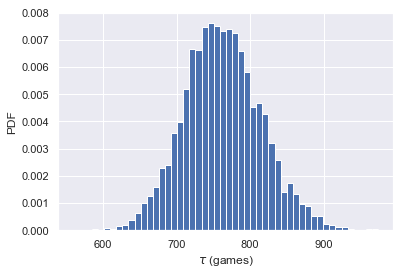

In [24]:
bs_rep_nohitter = draw_bs_reps(nohitter_times, np.mean, size=10000)

con_int = np.percentile(bs_rep_nohitter, [2.5, 97.5])
print( '95% confidence level = ',con_int,'games')

_ = plt.hist(bs_rep_nohitter, bins=50, density =True)
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')
plt.show()


### A function to do pairs bootstrap
Pairs bootstrap involves resampling pairs of data. Each collection of pairs fit with a line, in this case using np.polyfit(). We do this again and again, getting bootstrap replicates of the parameter values. To have a useful tool for doing pairs bootstrap, you will write a function to perform pairs bootstrap on a set of x,y data.

   #### Instructions

    1-Define a function with call signature draw_bs_pairs_linreg(x, y, size=1) to perform pairs bootstrap estimates on linear regression parameters.
    2-Use np.arange() to set up an array of indices going from 0 to len(x). These are what you will resample and use them to pick values out of the x and y arrays.
    3-Use np.empty() to initialize the slope and intercept replicate arrays to be of size size.
    4-Write a for loop to:
    5-Resample the indices inds. Use np.random.choice() to do this.
    6-Make new x and y arrays bs_x and bs_y using the the resampled indices bs_inds. To do this, slice x and y with bs_inds.
    7-Use np.polyfit() on the new x and y arrays and store the computed slope and intercept.
    8-Return the pair bootstrap replicates of the slope and intercept.

In [25]:
def draw_bs_pairs_linreg(x, y, size=1):
    inds = np.arange(len(x))
    bs_slope_rep = np.empty(size)
    bs_intercept_rep =np.empty(size)
    
    for i in range(size):
        bs_inds = np.random.choice(inds, len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_rep[i], bs_intercept_rep[i] = np.polyfit(bs_x, bs_y,1)
    return bs_slope_rep, bs_intercept_rep
        
    

### Pairs bootstrap of literacy/fertility data
Using the function you just wrote, perform pairs bootstrap to plot a histogram describing the estimate of the slope from the illiteracy/fertility data. Also report the 95% confidence interval of the slope. The data is available to you in the NumPy arrays illiteracy and fertility.

As a reminder, draw_bs_pairs_linreg() has a function signature of draw_bs_pairs_linreg(x, y, size=1), and it returns two values: bs_slope_reps and bs_intercept_reps.

#### Instructions

    1-Use your draw_bs_pairs_linreg() function to take 1000 bootstrap replicates of the slope and intercept. The x-axis data is illiteracy and y-axis data is fertility.
    2-Compute and print the 95% bootstrap confidence interval for the slope.
    3-Plot and show a histogram of the slope replicates. Be sure to label your axes. This has been done for you, so click 'Submit Answer' to see your histogram!


95% confidence level for slop =  [0.044197   0.05534574]


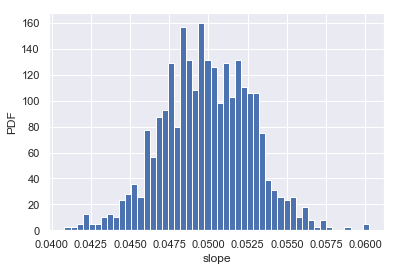

In [26]:
bs_slop_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy, fertility, size=1000)

print('95% confidence level for slop = ', np.percentile(bs_slop_reps, [2.5, 97.5]))

_ = plt.hist(bs_slop_reps, bins=50, density=True)
_ =plt.xlabel('slope')
_ = plt.ylabel('PDF')

plt.show()

### Plotting bootstrap regressions
A nice way to visualize the variability we might expect in a linear regression is to plot the line you would get from each bootstrap replicate of the slope and intercept. Do this for the first 100 of your bootstrap replicates of the slope and intercept (stored as bs_slope_reps and bs_intercept_reps).

#### Instructions

    1-Generate an array of x-values consisting of 0 and 100 for the plot of the regression lines. Use the np.array() function for this.
    2-Write a for loop in which you plot a regression line with a slope and intercept given by the pairs bootstrap replicates. Do this for 100 lines.
    3-When plotting the regression lines in each iteration of the for loop, recall the regression equation y = a*x + b. Here, a is bs_slope_reps[i] and b is bs_intercept_reps[i].
    4-Specify the keyword arguments linewidth=0.5, alpha=0.2, and color='red' in your call to plt.plot().
    5-Make a scatter plot with illiteracy on the x-axis and fertility on the y-axis. Remember to specify the marker='.' and linestyle='none' keyword arguments.
    6-Label the axes, set a 2% margin, and show the plot. This has been done for you, so hit 'Submit Answer' to visualize the bootstrap regressions!

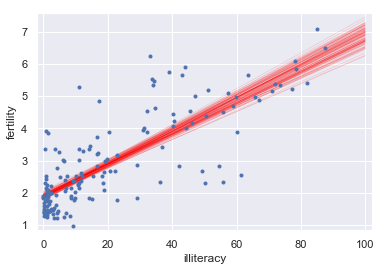

In [27]:
x = np.array([0,100])
for i in range(100):
    _ = plt.plot(x, bs_slop_reps[i]*x+bs_intercept_reps[i], linewidth=0.5, alpha=0.2, color='red')
    
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()

### Generating a permutation sample
In the video, you learned that permutation sampling is a great way to simulate the hypothesis that two variables have identical probability distributions. This is often a hypothesis you want to test, so in this exercise, you will write a function to generate a permutation sample from two data sets.

Remember, a permutation sample of two arrays having respectively n1 and n2 entries is constructed by concatenating the arrays together, scrambling the contents of the concatenated array, and then taking the first n1 entries as the permutation sample of the first array and the last n2 entries as the permutation sample of the second array.

   #### Instructions

    1-Concatenate the two input arrays into one using np.concatenate(). Be sure to pass in data1 and data2 as one argument (data1, data2).
    2-Use np.random.permutation() to permute the concatenated array.
    3-Store the first len(data1) entries of permuted_data as perm_sample_1 and the last len(data2) entries of permuted_data as perm_sample_2. In practice, this can be achieved by using :len(data1) and len(data1): to slice permuted_data.
    4-Return perm_sample_1 and perm_sample_2.

In [28]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2
    

### Visualizing  permutation sampling
To help see how permutation sampling works, in this exercise you will generate permutation samples and look at them graphically.

We will use the Sheffield Weather Station data again, this time considering the monthly rainfall in July (a dry month) and November (a wet month). We expect these might be differently distributed, so we will take permutation samples to see how their ECDFs would look if they were identically distributed.

The data are stored in the Numpy arrays rain_june and rain_november.

As a reminder, permutation_sample() has a function signature of permutation_sample(data_1, data_2) with a return value of `permuted_data[:len(data_1)]`,` permuted_data[len(data_1):]`, where 
`permuted_data = np.random.permutation(np.concatenate((data_1, data_2)))`.

#### Instructions

    1-Write a for loop to 50 generate permutation samples, compute their ECDFs, and plot them.
    2-Generate a permutation sample pair from rain_june and rain_november using your permutation_sample() function.
    3-Generate the x and y values for an ECDF for each of the two permutation samples for the ECDF using your ecdf() function.
    4-Plot the ECDF of the first permutation sample (x_1 and y_1) as dots. Do the same for the second permutation sample (x_2 and y_2).
    5-Generate x and y values for ECDFs for the rain_june and rain_november data and plot the ECDFs using respectively the keyword arguments color='red' and color='blue'.
    6-Label your axes, set a 2% margin, and show your plot. This has been done for you, so just hit 'Submit Answer' to view the plot!

In [29]:
rain_june =np.array([  66.2,   39.7,   76.4,   26.5,   11.2,   61.8,    6.1,   48.4,
         89.2,  104. ,   34. ,   60.6,   57.1,   79.1,   90.9,   32.3,
         63.8,   78.2,   27.5,   43.4,   30.1,   17.3,   77.5,   44.9,
         92.2,   39.6,   79.4,   66.1,   53.5,   98.5,   20.8,   55.5,
         39.6,   56. ,   65.1,   14.8,   13.2,   88.1,    8.4,   32.1,
         19.6,   40.4,    2.2,   77.5,  105.4,   77.2,   38. ,   27.1,
        111.8,   17.2,   26.7,   23.3,   77.2,   87.2,   27.7,   50.6,
         60.3,   15.1,    6. ,   29.4,   39.3,   56.3,   80.4,   85.3,
         68.4,   72.5,   13.3,   28.4,   14.7,   37.4,   49.5,   57.2,
         85.9,   82.1,   31.8,  126.6,   30.7,   41.4,   33.9,   13.5,
         99.1,   70.2,   91.8,   61.3,   13.7,   54.9,   62.5,   24.2,
         69.4,   83.1,   44. ,   48.5,   11.9,   16.6,   66.4,   90. ,
         34.9,  132.8,   33.4,  225. ,    7.6,   40.9,   76.5,   48. ,
        140. ,   55.9,   54.1,   46.4,   68.6,   52.2,  108.3,   14.6,
         11.3,   29.8,  130.9,  152.4,   61. ,   46.6,   43.9,   30.9,
        111.1,   68.5,   42.2,    9.8,  285.6,   56.7,  168.2,   41.2,
         47.8,  166.6,   37.8,   45.4,   43.2])

rain_november = np.array([  83.6,   30.9,   62.2,   37. ,   41. ,  160.2,   18.2,  122.4,
         71.3,   44.2,   49.1,   37.6,  114.5,   28.8,   82.5,   71.9,
         50.7,   67.7,  112. ,   63.6,   42.8,   57.2,   99.1,   86.4,
         84.4,   38.1,   17.7,  102.2,  101.3,   58. ,   82. ,  101.4,
         81.4,  100.1,   54.6,   39.6,   57.5,   29.2,   48.8,   37.3,
        115.4,   55.6,   62. ,   95. ,   84.2,  118.1,  153.2,   83.4,
        104.7,   59. ,   46.4,   50. ,  147.6,   76.8,   59.9,  101.8,
        136.6,  173. ,   92.5,   37. ,   59.8,  142.1,    9.9,  158.2,
         72.6,   28. ,  112.9,  119.3,  199.2,   50.7,   44. ,  170.7,
         67.2,   21.4,   61.3,   15.6,  106. ,  116.2,   42.3,   38.5,
        132.5,   40.8,  147.5,   93.9,   71.4,   87.3,  163.7,  141.4,
         62.6,   84.9,   28.8,  121.1,   28.6,   32.4,  112. ,   50. ,
         96.9,   81.8,   70.4,  117.5,   41.2,  124.9,   78.2,   93. ,
         53.5,   50.5,   42.6,   47.9,   73.1,  129.1,   56.9,  103.3,
         60.5,  134.3,   93.1,   49.5,   48.2,  167.9,   27. ,  111.1,
         55.4,   36.2,   57.4,   66.8,   58.3,   60. ,  161.6,  112.7,
         37.4,  110.6,   56.6,   95.8,  126.8])

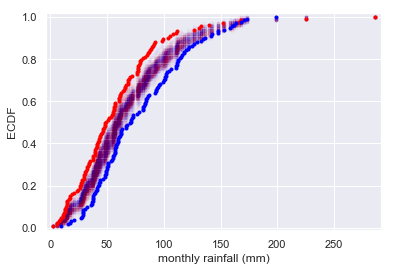

In [30]:
for _ in  range(50):
    #Generate a permutation sample
    perm_samp_1, perm_samp_2 = permutation_sample(rain_june, rain_november)
    
    x_1 , y_1 = ecdf(perm_samp_1)
    x_2 , y_2 = ecdf(perm_samp_2)
    
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue', alpha=0.02)
    
x_1 , y_1 = ecdf(rain_june)
x_2 , y_2 = ecdf(rain_november)

_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

plt.margins(0.02)

_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')

plt.show()
    
    

### Generating permutation replicates
As discussed in the video, a permutation replicate is a single value of a statistic computed from a permutation sample. As the `draw_bs_reps()` function you wrote in chapter 2 is useful for you to generate bootstrap replicates, it is useful to have a similar function, `draw_perm_reps()`, to generate permutation replicates. You will write this useful function in this exercise.

The function has call signature draw_perm_reps(data_1, data_2, func, size=1). Importantly, func must be a function that takes two arrays as arguments. In most circumstances, func will be a function you write yourself.

   #### Instructions
    1-Define a function with this signature: draw_perm_reps(data_1, data_2, func, size=1).
    2-Initialize an array to hold the permutation replicates using np.empty().
    3-Write a for loop to:
    4-Compute a permutation sample using your permutation_sample() function
    5-Pass the sample into func to compute the replicate and store the result in your array of replicates.
    6-Return the array of replicates.

In [31]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [32]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

### A one-sample bootstrap hypothesis test
Another juvenile frog was studied, Frog C, and you want to see if Frog B and Frog C have similar impact forces. Unfortunately, you do not have Frog C's impact forces available, but you know they have a mean of 0.55 N. Because you don't have the original data, you cannot do a permutation test, and you cannot assess the hypothesis that the forces from Frog B and Frog C come from the same distribution. You will therefore test another, less restrictive hypothesis: The mean strike force of Frog B is equal to that of Frog C.

To set up the bootstrap hypothesis test, you will take the mean as our test statistic. Remember, your goal is to calculate the probability of getting a mean impact force less than or equal to what was observed for Frog B if the hypothesis that the true mean of Frog B's impact forces is equal to that of Frog C is true. You first translate all of the data of Frog B such that the mean is 0.55 N. This involves adding the mean force of Frog C and subtracting the mean force of Frog B from each measurement of Frog B. This leaves other properties of Frog B's distribution, such as the variance, unchanged.

   #### Instructions

    1-Translate the impact forces of Frog B such that its mean is 0.55 N.
    2-Use your draw_bs_reps() function to take 10,000 bootstrap replicates of the mean of your translated forces.
    3-Compute the p-value by finding the fraction of your bootstrap replicates that are less than the observed mean impact force of Frog B. Note that the variable of interest here is force_b.
    4-Print your p-value.

In [33]:
force_b =np.array([ 0.172,  0.142,  0.037,  0.453,  0.355,  0.022,  0.502,  0.273,
        0.72 ,  0.582,  0.198,  0.198,  0.597,  0.516,  0.815,  0.402,
        0.605,  0.711,  0.614,  0.468])

In [34]:
translated_force_b = force_b - np.mean(force_b) +0.55

bs_rep_translated_force_b = draw_bs_reps(translated_force_b, np.mean, 10000)

p = np.sum(bs_rep_translated_force_b <= np.mean(force_b))/10000

print('p-value = ', p)


p-value =  0.0057


### A two-sample bootstrap hypothesis test for difference of means
We now want to test the hypothesis that Frog A and Frog B have the same mean impact force, but not necessarily the same distribution, which is also impossible with a permutation test.

To do the two-sample bootstrap test, we shift both arrays to have the same mean, since we are simulating the hypothesis that their means are, in fact, equal. We then draw bootstrap samples out of the shifted arrays and compute the difference in means. This constitutes a bootstrap replicate, and we generate many of them. The p-value is the fraction of replicates with a difference in means greater than or equal to what was observed.

The objects forces_concat and empirical_diff_means are already in your namespace.

#### Instructions

    1-Compute the mean of all forces (from forces_concat) using np.mean().
    2-Generate shifted data sets for both force_a and force_b such that the mean of each is the mean of the concatenated array of impact forces.
    3-Generate 10,000 bootstrap replicates of the mean each for the two shifted arrays.
    4-Compute the bootstrap replicates of the difference of means by subtracting the replicates of the shifted impact force of Frog B from those of Frog A.
    5-Compute and print the p-value from your bootstrap replicates.

In [35]:
force_a =np.array([ 1.612,  0.605,  0.327,  0.946,  0.541,  1.539,  0.529,  0.628,
        1.453,  0.297,  0.703,  0.269,  0.751,  0.245,  1.182,  0.515,
        0.435,  0.383,  0.457,  0.73 ])

In [36]:
forces_concat = np.concatenate((force_a, force_b))
mean_force = np.mean(forces_concat)

shifted_force_a = force_a - np.mean(force_a) + mean_force
shifted_force_b = force_b - np.mean(force_b) + mean_force

rep_shifted_force_a = draw_bs_reps(shifted_force_a, np.mean, 10000)
rep_shifted_force_b = draw_bs_reps(shifted_force_b, np.mean, 10000)

diff_rep = rep_shifted_force_a - rep_shifted_force_b
emp_diff_mean = np.mean(force_a) - np.mean(force_b)

p = np.sum(diff_rep >= emp_diff_mean) /len(diff_rep)
print('p-value: ', p)

p-value:  0.0048


### The vote for the Civil Rights Act in 1964
The Civil Rights Act of 1964 was one of the most important pieces of legislation ever passed in the USA. Excluding "present" and "abstain" votes, 153 House Democrats and 136 Republicans voted yea. However, 91 Democrats and 35 Republicans voted nay. `Did party affiliation make a difference in the vote?`

To answer this question, you will evaluate the hypothesis that the party of a House member has no bearing on his or her vote. You will use the fraction of Democrats voting in favor as your test statistic and evaluate the probability of observing a fraction of Democrats voting in favor at least as small as the observed fraction of 153/244. (That's right, at least as small as. In 1964, it was the Democrats who were less progressive on civil rights issues.) To do this, permute the party labels of the House voters and then arbitrarily divide them into "Democrats" and "Republicans" and compute the fraction of Democrats voting yea.

   #### Instructions

    1-Construct Boolean arrays, dems and reps that contain the votes of the respective parties; e.g., dems has 153 True entries and 91 False entries.
    2-Write a function, frac_yea_dems(dems, reps) that returns the fraction of Democrats that voted yea. The first input is an array of Booleans, Two inputs are required to use your draw_perm_reps() function, but the second is not used.
    3-Use your draw_perm_reps() function to draw 10,000 permutation replicates of the fraction of Democrat yea votes.
    4-Compute and print the p-value.

In [37]:
dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True] * 136 + [False] * 36)

def frac_yea_dems(dems, reps):
    frac = np.sum(dems) / len(dems)
    return frac
perm_replicates = draw_perm_reps(dems, reps, frac_yea_dems, 10000)

p = np.sum(perm_replicates >= (153/244)) / len(perm_replicates)
print('p-value: ', p)

p-value:  0.9998
